<a href="https://colab.research.google.com/github/mjonesvaughn/DATA-201-Projects-/blob/main/Project3_201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2
import pandas as pd
import numpy as np
# Read the data from csv file
df = pd.read_csv('/content/drive/MyDrive/Glassdoor Gender Pay Gap.csv')
print(df.head())
print(df.tail())
mean_value = np.mean(df['Age'])
print(f"Mean Age: {mean_value}")
mean_value = np.mean(df['BasePay'])
print(f"Mean BasePay: {mean_value}")


              JobTitle  Gender  Age  PerfEval Education            Dept  \
0     Graphic Designer  Female   18         5   College      Operations   
1    Software Engineer    Male   21         5   College      Management   
2  Warehouse Associate  Female   19         4       PhD  Administration   
3    Software Engineer    Male   20         5   Masters           Sales   
4     Graphic Designer    Male   26         5   Masters     Engineering   

   Seniority  BasePay  Bonus  
0          2    42363   9938  
1          5   108476  11128  
2          5    90208   9268  
3          4   108080  10154  
4          5    99464   9319  
                JobTitle  Gender  Age  PerfEval    Education            Dept  \
995  Marketing Associate  Female   61         1  High School  Administration   
996       Data Scientist    Male   57         1      Masters           Sales   
997    Financial Analyst    Male   48         1  High School      Operations   
998    Financial Analyst    Male   65      

In [ ]:
missing_values = df.isnull().sum()

In [ ]:
#3
import matplotlib.pyplot as plt
import seaborn as sns

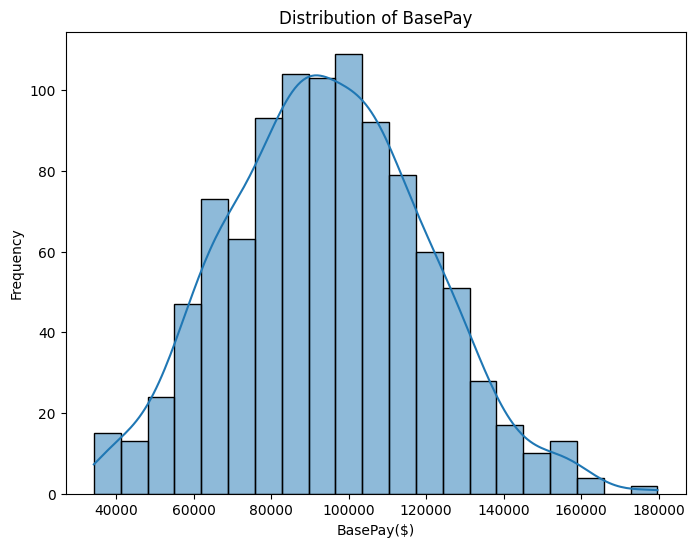

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['BasePay'], kde=True)
plt.title('Distribution of BasePay')
plt.xlabel('BasePay($)')
plt.ylabel('Frequency')
plt.show()

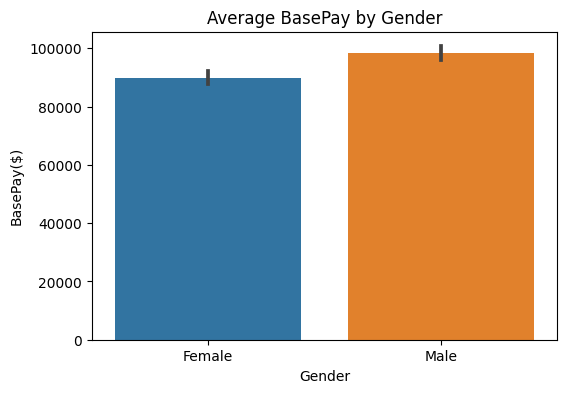

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(x='Gender', y='BasePay', data=df)
plt.title('Average BasePay by Gender')
plt.xlabel('Gender')
plt.ylabel('BasePay($)')
plt.show()

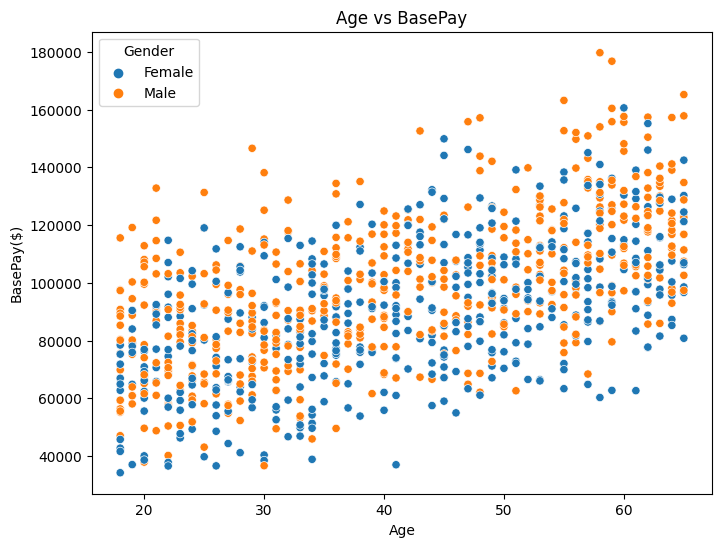

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='BasePay', hue='Gender', data=df)
plt.title('Age vs BasePay')
plt.xlabel('Age')
plt.ylabel('BasePay($)')
plt.show()

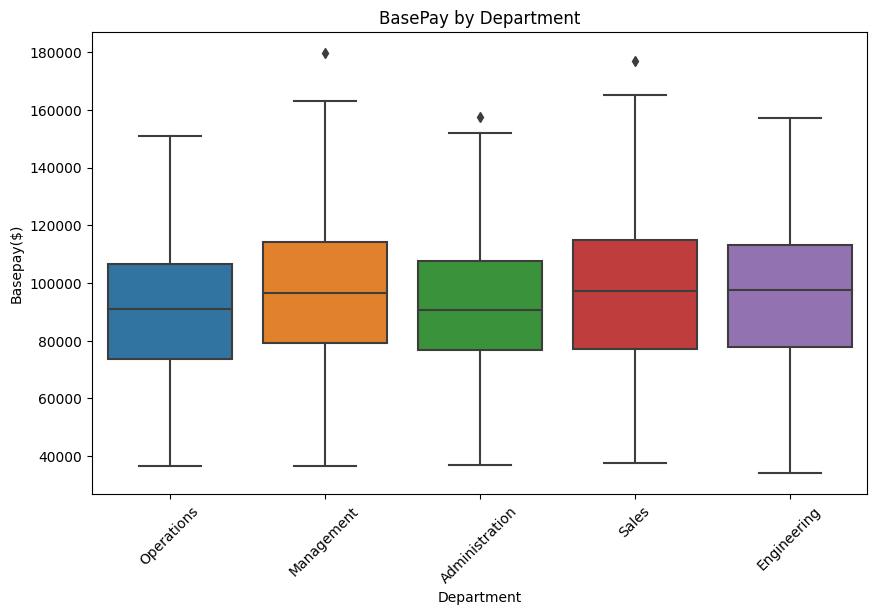

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Dept', y='BasePay', data=df)
plt.title('BasePay by Department')
plt.xlabel('Department')
plt.ylabel('Basepay($)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-cfbd1bb35847>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


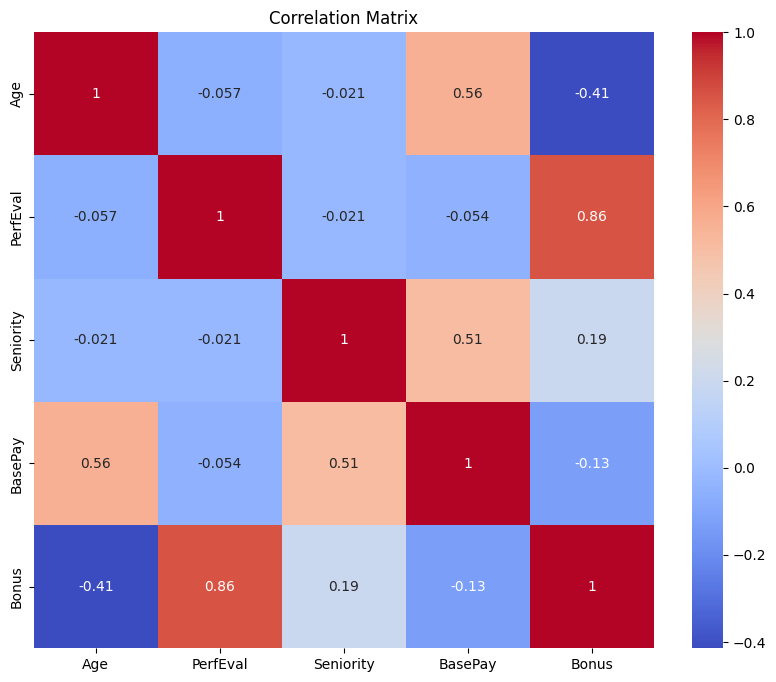

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#4
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = df[['Age', 'PerfEval', 'Seniority']]
y = df['BasePay']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")



Mean Squared Error: 259846733.783756
R-squared (R2) Score: 0.5895269504522443


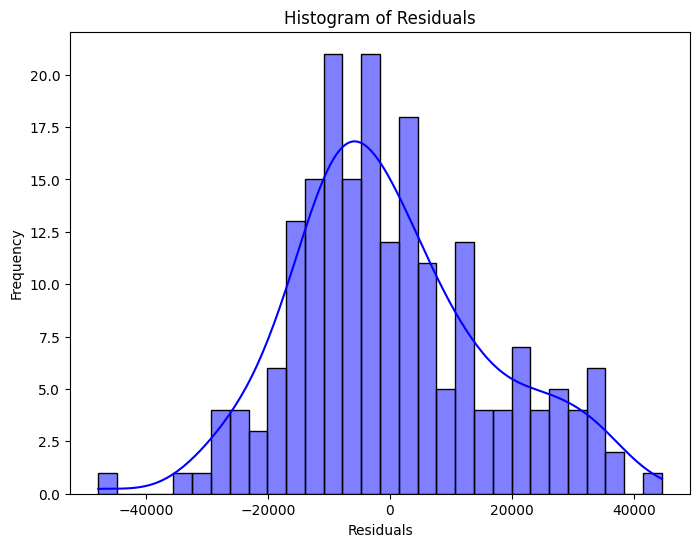

In [ ]:
#5
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

ValueError: ignored

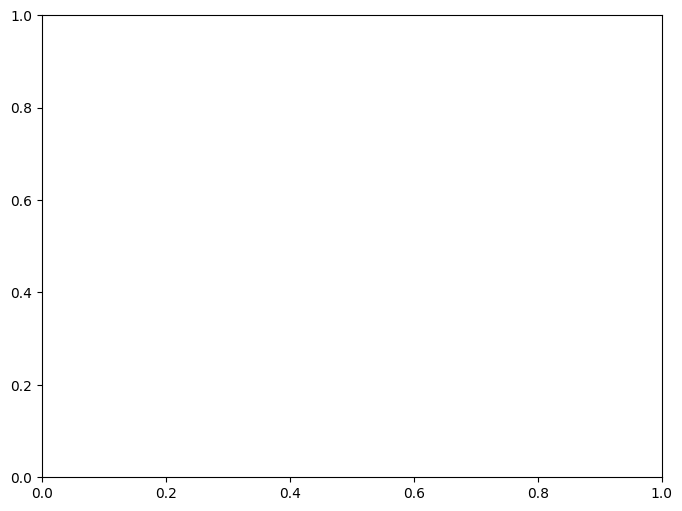

In [ ]:
#6
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)  # Add a horizontal line at y=0
plt.title('Scatterplot of Predicted Values vs. Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
#7
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred
intercept = model.intercept_
slope = model.coef_[0]
print("Intercept (beta_0):", intercept)
print("Coefficient (beta_1):", slope)



Intercept (beta_0): 24716.84507120271
Coefficient (beta_1): 1016.199948891129


In [ ]:
# 4. Use scikit-learn Kmeans to train the data. Use appropriate metric
from sklearn.cluster import KMeans

# Separate the data for males and females
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Train KMeans model for males
male_model = KMeans(n_clusters=2)
male_model.fit(male_data[['Age', 'BasePay']])

# Train KMeans model for females
female_model = KMeans(n_clusters=2)
female_model.fit(female_data[['Age', 'BasePay']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

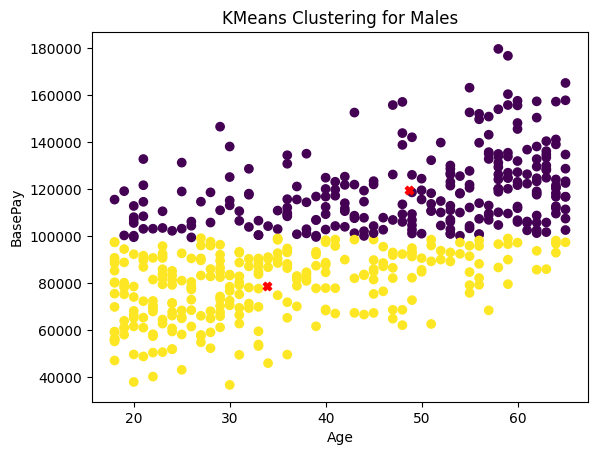

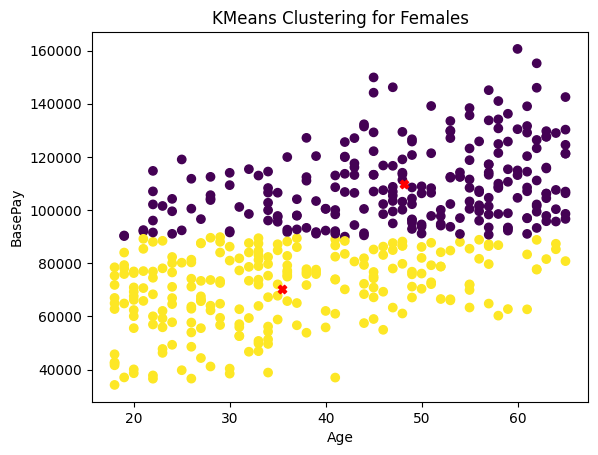

In [ ]:
# Plot for males
plt.scatter(male_data['Age'], male_data['BasePay'], c=male_model.labels_)
plt.scatter(male_model.cluster_centers_[:, 0], male_model.cluster_centers_[:, 1], marker='X', c='red')
plt.xlabel('Age')
plt.ylabel('BasePay')
plt.title('KMeans Clustering for Males')
plt.show()

# Plot for females
plt.scatter(female_data['Age'], female_data['BasePay'], c=female_model.labels_)
plt.scatter(female_model.cluster_centers_[:, 0], female_model.cluster_centers_[:, 1], marker='X', c='red')
plt.xlabel('Age')
plt.ylabel('BasePay')
plt.title('KMeans Clustering for Females')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

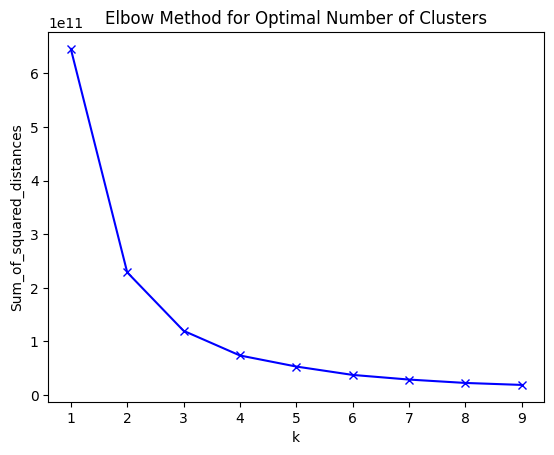

In [ ]:
# 5.  Plot the Elbow Method to choose optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# We need to extract the features from the DataFrame and combine them into a single array:


X = df[['Age', 'BasePay', 'Bonus']].values


# Next, we can calculate the sum of squared distances for different values of k (number of clusters):

Sum_of_squared_distances = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)


# Finally, we can plot the elbow method graph:


plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [ ]:
#6
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import f_oneway


interesting_features = ["Age", "BasePay", "Bonus"]
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(df[interesting_features])
anova_results = {}
for feature in interesting_features:
    f_statistic, p_value = f_oneway(df[df['cluster'] == 0][feature],
                                    df[df['cluster'] == 1][feature],
                                    df[df['cluster'] == 2][feature])
    anova_results[feature] = (f_statistic, p_value)

print("ANOVA Results:")
for feature, (f_statistic, p_value) in anova_results.items():
    print(f"Feature: {feature}")
    print(f"F-Statistic: {f_statistic}")
    print(f"P-Value: {p_value}\n")



ANOVA Results:
Feature: Age
F-Statistic: 184.34796215511528
P-Value: 7.508631177982145e-69

Feature: BasePay
F-Statistic: 2259.741300756091
P-Value: 0.0

Feature: Bonus
F-Statistic: 10.132437058961399
P-Value: 4.402132890607326e-05



In [2]:
#7
#Based upon the elbow the the optimal number of the clusters that should be used is 3. The elbow method displayed that the intertia value begins to slow down/stabilize at 3 and if we were to continue to add clusters beyond that k value would not be beneficial.
#The p-value for all three of these features are statistcally significant and is substantial to reject the null  hypothesis in favor of the alternative hypothesis.

